In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

In [91]:
class NeuralNet:
    def __init__(self, dataFile, header=None):
        self.raw_input = pd.read_csv(dataFile, sep=',', header = None)

    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input
     
        self.processed_data.columns = ['sepal_length', 'sepal_width',
                                       'petal_length', 'pental_width', 'class']
       # Remove null or NA values
        self.processed_data.dropna(inplace = True)
        # Remove any redundant rows
        self.processed_data.drop_duplicates(inplace = True)

        #Change categorical into numerical
        le = LabelEncoder()
        self.processed_data['class'] = le.fit_transform(self.processed_data['class'])

        #Data Standarization
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        species = self.processed_data.iloc[:, (ncols-1)]
        self.processed_data = self.processed_data.iloc[:, 0:(ncols - 1)]
        self.processed_data = pd.DataFrame(StandardScaler().fit_transform(self.processed_data), columns=self.processed_data.columns, index=self.processed_data.index) 
        self.processed_data = pd.concat([self.processed_data, species], axis=1)
        return 0

    # TODO: Train and evaluate models for all combinations of parameters
    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    def train_evaluate(self):


        #DATA SPLITTING
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols-1)].values.ravel()
        # Split the dataset 80(train) : 20(test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Below are the hyperparameters that you need to use for model
        #   evaluation
        activations = ['logistic', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [50, 100] # also known as epochs
        num_hidden_layers = [2, 3]

        # Create the neural network and be sure to keep track of the performance
        #   metrics
       

        result = pd.DataFrame(columns = ['activation', 'learn_rate', 'epochs', 'num_hidden_layer', 'acc_train', 'loss_train','MSE_train','acc_test', 'loss_test', 'MSE_test'])
     
        figures, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))

        for activation in activations:
           for learn_rate in learning_rate:
                for iteration in max_iterations:
                    for hidden_layer in num_hidden_layers:
                        #Performing MLPClassifier
                        mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer,), activation = activation, learning_rate_init = learn_rate, max_iter = iteration, solver = 'sgd')
                        mlp = mlp.fit(X_train,y_train)

                        #Train data accuracy
                        train_accuracy = mlp.score(X_train, y_train)
                        #Train data loss
                        train_loss = mlp.loss_

                        #Train MSE
                        y_train_predict = mlp.predict(X_train)
                        train_mse = mean_squared_error(y_train, y_train_predict)

                        #Predicion
                        y_test_predict = mlp.predict(X_test)
                        test_mse = mean_squared_error(y_test, y_test_predict)

                        #Making the confusion matrix to figure out the test accuracy
                        matrix = confusion_matrix(y_test, y_test_predict)
                        #Test data accuracy
                        test_accuracy = accuracy_score(y_test,  y_test_predict)
                        #Test data loss
                        test_loss = 1 - test_accuracy
                    

       # plot each model's accuracy vs. epochs in the same figure               

        # Plot the model history for each model in a single plot
        # model history is a plot of accuracy vs number of epochs
        # you may want to create a large sized plot to show multiple lines
        # in a same figure.
        
                        result.loc[len(result)] = [activation, learn_rate, iteration, hidden_layer, train_accuracy, train_loss, train_mse, test_accuracy, test_loss, test_mse]
            
                        if activation == 'logistic':
                            axes[0].plot(mlp.loss_curve_, label='Activation = {} LR = {}, Iter = {}, Layer = {}'.format(activation, learn_rate, iteration, hidden_layer))
                            axes[0].set_xlabel('Epoch')
                            axes[0].set_ylabel('Loss')
                            axes[0].legend(loc = 'upper right', fontsize = 6)

                        elif activation == 'tanh':
                            axes[1].plot(mlp.loss_curve_, label='Activation = {} LR = {}, Iter = {}, Layer = {}'.format(activation, learn_rate, iteration, hidden_layer))
                            axes[1].set_xlabel('Epoch')
                            axes[1].set_ylabel('Loss')
                            axes[1].legend(loc = 'upper right', fontsize = 6)

                        else:
                            axes[2].plot(mlp.loss_curve_, label='Activation = {} LR = {}, Iter = {}, Layer = {}'.format(activation, learn_rate, iteration, hidden_layer))
                            axes[2].set_xlabel('Epoch')
                            axes[2].set_ylabel('Loss')
                            axes[2].legend(loc = 'upper right', fontsize = 6)

        plt.show()
        print(result)

        return 0


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:68

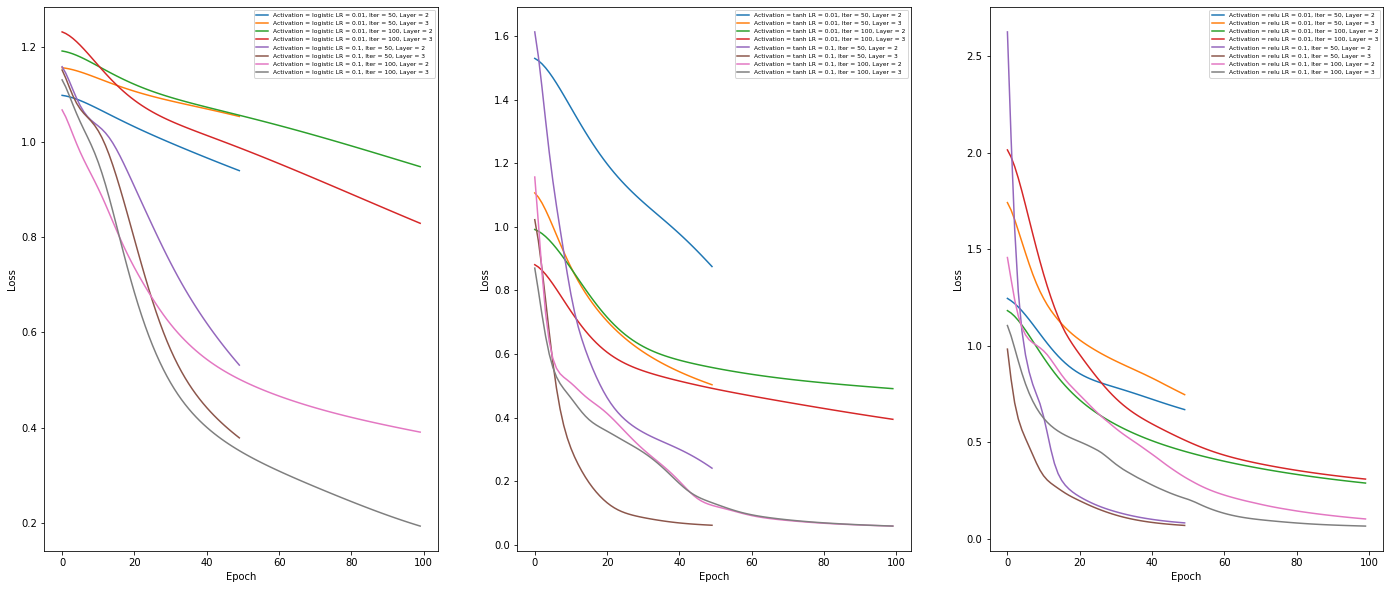

   activation  learn_rate  epochs  num_hidden_layer  acc_train  loss_train  \
0    logistic        0.01      50                 2   0.641026    0.940098   
1    logistic        0.01      50                 3   0.641026    1.054014   
2    logistic        0.01     100                 2   0.692308    0.948473   
3    logistic        0.01     100                 3   0.794872    0.829436   
4    logistic        0.10      50                 2   0.871795    0.531307   
5    logistic        0.10      50                 3   0.897436    0.378333   
6    logistic        0.10     100                 2   0.871795    0.390426   
7    logistic        0.10     100                 3   0.965812    0.192885   
8        tanh        0.01      50                 2   0.717949    0.875249   
9        tanh        0.01      50                 3   0.829060    0.503439   
10       tanh        0.01     100                 2   0.803419    0.491193   
11       tanh        0.01     100                 3   0.871795  

In [92]:
if __name__ == "__main__":
    neural_network = NeuralNet("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()